# DS2500 Day 13

Content:
- Cross Validation
- Measuring Binary Classifier Performance

Admin:
- hw4 due tonight
- proposal due next monday
    - anybody want to workshop one live here at the start of class?

# In Class Assignment 1

Use the given 1-nearest neighbor classifier which estimates a penguins `species` by observing its `bill_depth_mm` and `bill_length_mm` to:
- Plot a confusion matrix which shows the performance of your classifier
- In a few sentences, explain whether this confusion matrix accurately represents the performance of the classifier on **new** penguins (those the classifier hasn't trained on).  Why or why not?  How might you fix this issue?

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(how='any', inplace=True)

In [2]:
k = 1
x_feat_list = ['bill_depth_mm', 'bill_length_mm']
y_feat = 'species'

x = df_penguin.loc[:, x_feat_list].values
y_true = df_penguin.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
knn_classifier.fit(x, y_true)

# estimate each penguin's species
y_pred = knn_classifier.predict(x)

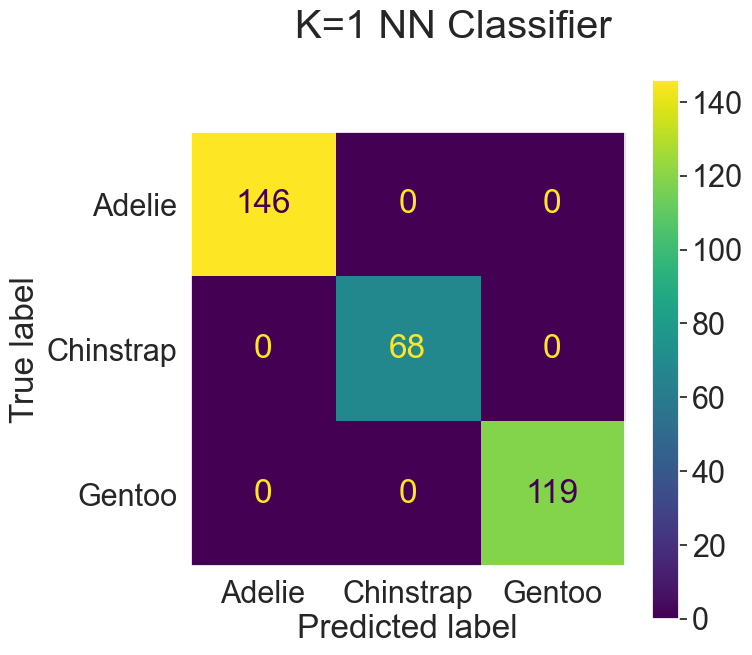

In [3]:
conf_mat = confusion_matrix(y_true = y_true, y_pred = y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y_true))

sns.set(font_scale = 2)
conf_mat_disp.plot()
plt.suptitle("K=1 NN Classifier")
plt.gcf().set_size_inches(7, 7)
plt.grid(False)

# In Class Assignment 2

One question we never answered: How do we pick the best K for a K-NN classifier?

A common solution is to try many different k and then choose the one which works "best".

<img src="https://i.ibb.co/2sc080h/best-k-penguin.png" width=00>

In this ICA, make this plot of the **cross validated** accuracy of the k-NN classifier for k = 1 to 50.
- in your cross validation, use `n_splits=10` folds of data
- write a function `get_cv_acc_knn()` which:
    - accepts:
        - `x`, `y_true`, `k` (of k-NN) as defined above
            - stick with the same classification problem where we estimate `species` from `bill_depth_mm` and `bill_length_mm`
        - `n_splits=10` (defaults)
    - returns 
        - the cross validated accuracy of k-NN on the dataset    

In [23]:
def get_cv_acc_knn(x, y_true, k, n_splits = 10):
    """ computes cross validated accuracy of a KNN classifier
    
    Args:
        x (np.array): (n_sample, n_feat) features
        y (np.array): (n_sample) target variable
        k (int): number of nearest neighbors in k-NN classifier
        
    Returns:
        acc (float): cross validated accuracy
    """
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    
    kfold = StratifiedKFold(n_splits = n_splits)
    
    y_pred = np.empty_like(y_true)
    for train_idx, test_idx in kfold.split(x, y_true):
        x_train = x[train_idx, :]
        x_test = x[test_idx, :]
        y_true_train = y_true[train_idx]
        
        knn_classifier.fit(x_train, y_true_train)
        y_pred[test_idx] = knn_classifier.predict(x_test)
        
    return accuracy_score(y_true, y_pred)

In [24]:
n_splits = 10
k = 5
x_feat_list = ["bill_depth_mm", "bill_length_mm"]
y_feat = "species"

x = df_penguin.loc[:, x_feat_list].values
y_true = df_penguin.loc[:, y_feat].values

k_all = np.array(range(1, 50))
acc = np.empty(k_all.shape, dtype = float)
for idx, k in enumerate(k_all):
    acc[idx] = get_cv_acc_knn(x, y_true, k)

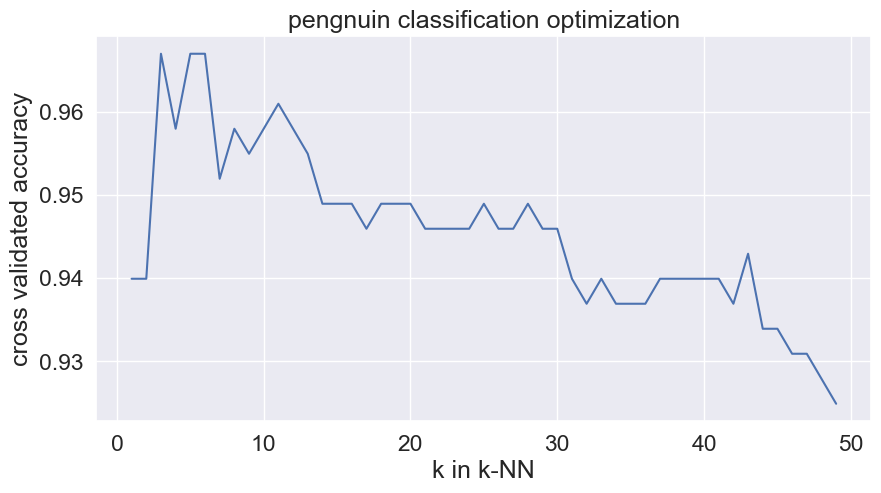

In [25]:
plt.plot(k_all, acc)
plt.xlabel("k in k-NN")
plt.ylabel("cross validated accuracy")
plt.title("pengnuin classification optimization")
plt.gcf().set_size_inches(10, 5)

## In Class Exercise 3

Using the values above (and maybe other operations on the dataframe too) select which of the four alarm systems is most appropriate to detect ICBMs.  Provide an explanation which is easily understood by a non-technical reader.

Is there any other information you'd need to make this decision?

alarm3 would be the best choice because it is the most consistent across all three test areas.